In [13]:
import pandas as pd 

df_train = pd.read_csv('train_data.csv')
df_valid = pd.read_csv('valid_data.csv')
df_test = pd.read_csv('test_data.csv')

In [14]:
# x_train, y_train 설정
x_train = df_train.iloc[:, [3, 4] + list(range(6, df_train.shape[1]))]
y_train = df_train.iloc[:, 5]

# x_valid, y_valid 설정
x_valid = df_valid.iloc[:, [3, 4] + list(range(6, df_valid.shape[1]))]
y_valid = df_valid.iloc[:, 5]

# x_test, y_test 설정
x_test = df_test.iloc[:, [3, 4] + list(range(6, df_test.shape[1]))]
y_test = df_test.iloc[:, 5]

In [15]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)
print(y_test.shape)

(50051, 535)
(50051,)
(12513, 535)
(12513,)
(7820, 535)
(7820,)


In [16]:
# 필요 라이브러리 불러오기 
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels with value between 0 and n_classes-1
# XGBClassifier를 사용하기 위해 대상 레이블을 정수로 인코딩해야 합니다.
# 현재 대상 레이블은 범주형 문자열이므로, LabelEncoder를 사용하여 숫자로 변환해야 합니다.

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

# got ['in' 'noise' 'normal' 'other' 'out']---> 클래스를 정수로 인코딩: [0 1 2 3 4]

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
import xgboost as xgb

In [20]:
from sklearn.metrics import accuracy_score

# DMatrix 객체 생성
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dvalid = xgb.DMatrix(data=x_valid, label=y_valid)
dtest = xgb.DMatrix(data=x_test, label=y_test)

# 파라미터 설정 (손실함수와 클래스 개수 지정하는 파라미터)
params = {
    'objective': 'multi:softprob',
    'num_class': 5,  
}

In [21]:
# 학습
num_round = 100
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
model = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=10)

# Early stopping은 모델의 과적합을 방지하고 최적의 모델을 얻기 위해 매우 유용한 기법을 사용하였음

C:\Users\life0\anaconda3\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mlogloss:1.28810	valid-mlogloss:1.29552
[1]	train-mlogloss:1.11554	valid-mlogloss:1.12666
[2]	train-mlogloss:0.99799	valid-mlogloss:1.01266
[3]	train-mlogloss:0.91161	valid-mlogloss:0.92838
[4]	train-mlogloss:0.84784	valid-mlogloss:0.86571
[5]	train-mlogloss:0.79883	valid-mlogloss:0.81947
[6]	train-mlogloss:0.76071	valid-mlogloss:0.78248
[7]	train-mlogloss:0.72966	valid-mlogloss:0.75395
[8]	train-mlogloss:0.70392	valid-mlogloss:0.72998
[9]	train-mlogloss:0.68335	valid-mlogloss:0.71036
[10]	train-mlogloss:0.66671	valid-mlogloss:0.69548
[11]	train-mlogloss:0.65038	valid-mlogloss:0.67999
[12]	train-mlogloss:0.63435	valid-mlogloss:0.66504
[13]	train-mlogloss:0.62359	valid-mlogloss:0.65424
[14]	train-mlogloss:0.61415	valid-mlogloss:0.64567
[15]	train-mlogloss:0.60494	valid-mlogloss:0.63781
[16]	train-mlogloss:0.59302	valid-mlogloss:0.62703
[17]	train-mlogloss:0.58105	valid-mlogloss:0.61618
[18]	train-mlogloss:0.56940	valid-mlogloss:0.60621
[19]	train-mlogloss:0.56193	valid-mloglos

In [22]:
# 예측
pred_probs = model.predict(dtest)
preds = np.asarray([np.argmax(line) for line in pred_probs])

In [23]:
# 정확도 계산
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.80%


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve

# 성능 평가 함수 정의
def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 테스트 데이터 예측
y_pred_train_probs = model.predict(dtrain)
y_pred_test_probs = model.predict(dtest)

# 예측 확률을 클래스 레이블로 변환
y_pred_train = np.argmax(y_pred_train_probs, axis=1)
y_pred_test = np.argmax(y_pred_test_probs, axis=1)

# 학습 데이터 평가
print("Training Data Evaluation:")
get_clf_eval(y_train, y_pred_train)

# 테스트 데이터 평가
print("\nTest Data Evaluation:")
get_clf_eval(y_test, y_pred_test)

Training Data Evaluation:
Confusion Matrix:
[[ 9918    56     0    97   486]
 [   58  3882     0    38    77]
 [    0     0 15824     0     0]
 [  175    49     0  5169   234]
 [  240    57     0    89 13602]]
Accuracy: 0.9669, Precision: 0.9670, Recall: 0.9669, F1-score: 0.9668

Test Data Evaluation:
Confusion Matrix:
[[1407   39    0   38  175]
 [  50  490    0   22   67]
 [   0    0 2462    0    0]
 [  74   28    0  641  135]
 [ 121   25    0   24 2022]]
Accuracy: 0.8980, Precision: 0.8988, Recall: 0.8980, F1-score: 0.8969


Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

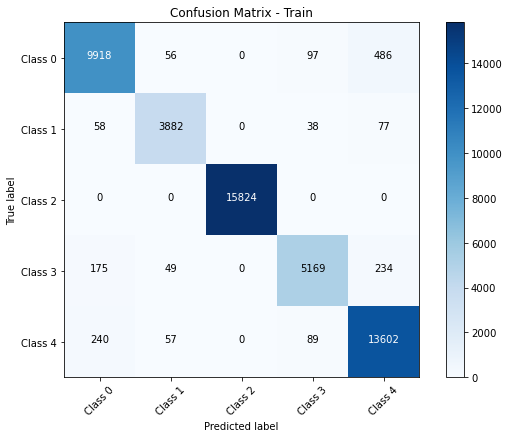

<Figure size 432x288 with 0 Axes>

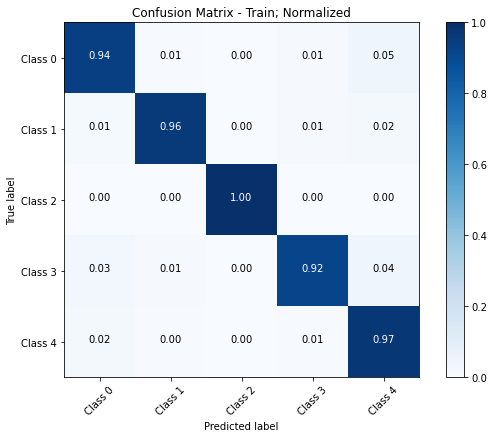

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import itertools 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#혼동행렬 train data   
confusion_matrix_data_train = np.array([[9918, 56, 0, 97, 486],
 [58, 3882, 0, 38,77],
 [0, 0, 15824, 0, 0],
 [175, 49, 0, 5169, 234],
 [240, 57, 0, 89, 13602]])

# 클래스 레이블 정의
class_labels = [0, 1, 2, 3, 4]

# 혼동 행렬 출력 (정규화하지 않음)
plt.figure()
plot_confusion_matrix(confusion_matrix_data_train, classes=classes,
                      title='Confusion Matrix - Train')

# 혼동 행렬 출력 (정규화)
plt.figure()
plot_confusion_matrix(confusion_matrix_data_train, classes=classes, normalize=True,
                      title='Confusion Matrix - Train; Normalized')

plt.show()


Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

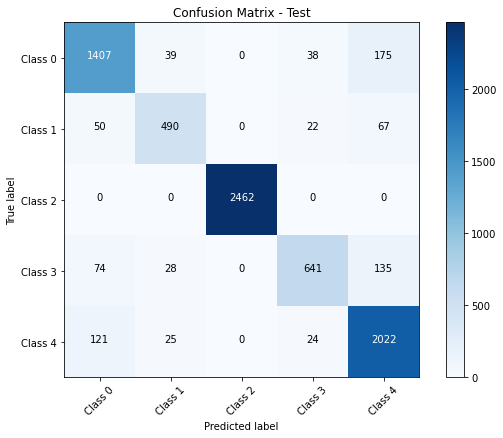

<Figure size 432x288 with 0 Axes>

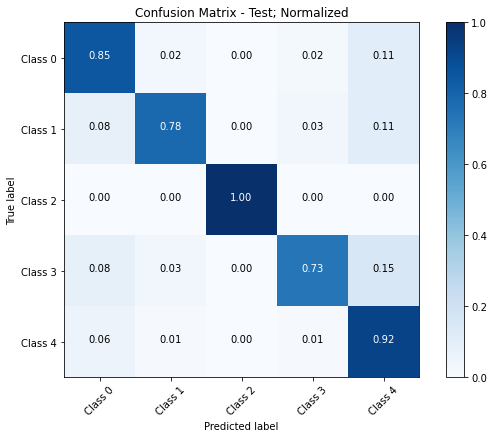

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import itertools 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#혼동행렬 testdata
confusion_matrix_data_test = np.array([[1407, 39, 0, 38, 175],
 [50, 490, 0, 22, 67],
 [0, 0, 2462, 0, 0],
 [74, 28, 0, 641, 135],
 [121, 25, 0, 24, 2022]])

# 클래스 레이블 정의
class_labels = [0, 1, 2, 3, 4]


# 혼동 행렬 출력 (정규화하지 않음)
plt.figure()
plot_confusion_matrix(confusion_matrix_data_test, classes=classes,
                      title='Confusion Matrix - Test')

# 혼동 행렬 출력 (정규화)
plt.figure()
plot_confusion_matrix(confusion_matrix_data_test, classes=classes, normalize=True,
                      title='Confusion Matrix - Test; Normalized')

plt.show()


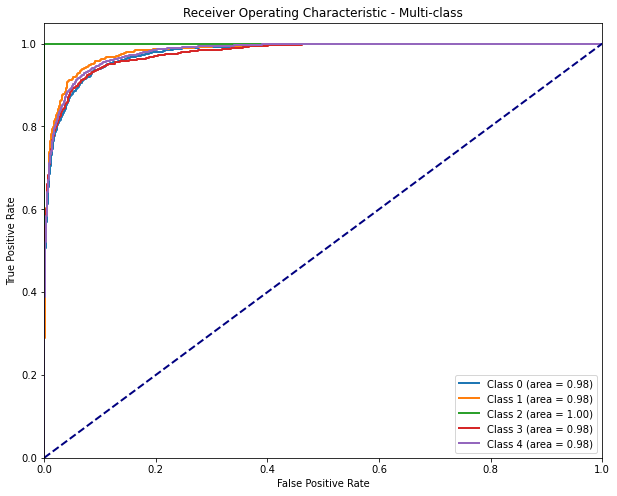

In [39]:
# ROC curve 및 AUC 계산 함수
def plot_roc_curve_multi(y_true, y_pred_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, thresholds = roc_curve(y_true == i, y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Multi-class')
    plt.legend(loc="lower right")
    plt.show()

    
# ROC curve 및 AUC 계산 및 그리기
plot_roc_curve_multi(y_test, y_pred_test_probs, 5)